In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager
import seaborn as sns
sns.set()

# Set-Up

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
project_id = 'bdlcw-295917' 
print(project_id)
!gcloud config set project {project_id}

bdlcw-295917
Updated property [core/project].


In [ ]:
import uuid
bucket_name = 'bdlcw_bucket' + str(uuid.uuid1())
!gsutil mb gs://{bucket_name}

Creating gs://bdlcw_bucketdbe77bcc-3630-11eb-aa8b-0242ac1c0002/...


In [ ]:
bucket_name

'bdlcw_bucketdbe77bcc-3630-11eb-aa8b-0242ac1c0002'

In [ ]:
def copy_csv_file_to_bucket(csv_bucket_name, csv_file,fpath):
  
  with open('/tmp/'+fpath, 'w') as f:
    f.write(csv_file)

  !gsutil cp //tmp/{fpath} gs://{csv_bucket_name}/

# Big Query SQL Queries

In [ ]:
%%bigquery --project bdlcw-295917 df_quest_1
SELECT
  Given_Name,
  Date_Of_Birth,
  Sex,
  Occurrences
FROM (
  SELECT
    DENSE_RANK() OVER (PARTITION BY Date_Of_Birth ORDER BY Occurrences DESC) AS rank,
    Date_Of_Birth,
    Given_Name,
    Sex,
    Occurrences,
  FROM (
    SELECT
      name AS Given_Name,
      year AS Date_Of_Birth,
      gender AS Sex,
      SUM(number) AS Occurrences
    FROM
      `bigquery-public-data.usa_names.usa_1910_current`
    GROUP BY
      gender,
      year,
      name))
WHERE
  rank = 1
ORDER BY
  Date_Of_Birth DESC
LIMIT
  10;

In [ ]:
%%bigquery --project bdlcw-295917 df_quest_2_GOT
SELECT
  name AS Given_Name,
  gender AS Sex,
  SUM(number) AS Occurrences,
FROM
  `bigquery-public-data.usa_names.usa_1910_current`
WHERE
  name IN ('Daenerys',
    'Khaleesi',
    'Arya',
    'Sansa',
    'Tyrion',
    'Jaime')
  AND year >=2018
GROUP BY
  name,
  gender
ORDER BY
  Occurrences DESC;

In [ ]:
%%bigquery --project bdlcw-295917 df_quest_2_Arya
  SELECT
  DISTINCT name AS Given_Name,
  gender AS Sex,
  SUM(number) AS Occurrences,
  year AS Date_Of_Birth
FROM
  `bigquery-public-data.usa_names.usa_1910_current`
WHERE
  name IN ( 'Arya')
  AND gender = 'F'
  AND year >= 2011
  AND year <=2015
GROUP BY
  year,
  name,
  gender
ORDER BY
  Date_Of_Birth DESC;

In [ ]:
%%bigquery --project bdlcw-295917 df_quest_2_Khal
SELECT
  DISTINCT name AS Given_Name,
  gender AS Sex,
  SUM(number) AS Occurrences,
  year AS Date_Of_Birth
FROM
  `bigquery-public-data.usa_names.usa_1910_current`
WHERE
  name IN ('Khaleesi')
GROUP BY
  name,
  gender,
  year
ORDER BY
  Date_Of_Birth DESC;

In [ ]:
%%bigquery --project bdlcw-295917 df_quest_2_Jaime
SELECT
  DISTINCT name AS Given_Name,
  gender AS Sex,
  SUM(number) AS Occurrences,
  year AS Date_Of_Birth
FROM
  `bigquery-public-data.usa_names.usa_1910_current`
WHERE
  name IN ('Jaime') AND
  gender = 'M'
    AND
    year >=2011
GROUP BY
  name,
  gender,
  year
ORDER BY
  Date_Of_Birth DESC;

In [ ]:
%%bigquery --project bdlcw-295917 df_quest_2_Marvel
SELECT
  name AS Given_Name,
  gender AS Sex,
  SUM(number) AS Occurrences
FROM
  `bigquery-public-data.usa_names.usa_1910_current`
WHERE
  name IN ('T,Challa',
    'Shuri',
    'Nakia',
    'Parker',
    'Loki' )
  AND year >=2018
GROUP BY
  name,
  gender
ORDER BY
  Occurrences DESC;

In [ ]:
%%bigquery --project bdlcw-295917 df_quest_2_Parker
SELECT
  DISTINCT name AS Given_Name,
  gender AS Sex,
  SUM(number) AS Occurrences,
  year AS Date_Of_Birth
FROM
  `bigquery-public-data.usa_names.usa_1910_current`
WHERE
  name IN ('Parker')
    AND
    gender = 'M'
GROUP BY
  name,
  gender,
  year
ORDER BY
  Date_Of_Birth DESC
  LIMIT
  15;

In [ ]:
%%bigquery --project bdlcw-295917 df_quest_2_Loki
SELECT
  name AS Given_Name,
  gender AS Sex,
  SUM(number) AS Occurrences,
  year AS Date_Of_Birth
FROM
  `bigquery-public-data.usa_names.usa_1910_current`
WHERE
  name IN (
    'Loki' )
GROUP BY
  name,
  gender,
  year
ORDER BY
  Date_Of_Birth DESC;

In [ ]:
csv_1 = df_quest_1.to_csv(index=False, header=0)

csv_2 = df_quest_2_GOT.to_csv(index=False, header=0)
csv_3 = df_quest_2_Arya.to_csv(index=False, header=0)
csv_4 = df_quest_2_Khal.to_csv(index=False, header=0)
csv_5 = df_quest_2_Jaime.to_csv(index=False, header=0)

csv_6 = df_quest_2_Marvel.to_csv(index=False, header=0)
csv_7 = df_quest_2_Parker.to_csv(index=False, header=0)
csv_8 = df_quest_2_Loki.to_csv(index=False, header=0)

In [ ]:
df_quest_1

,Given_Name,Date_Of_Birth,Sex,Occurrences
0,Liam,2019,M,20502
1,Liam,2018,M,19915
2,Emma,2017,F,19830
3,Emma,2016,F,19517
4,Emma,2015,F,20463
5,Emma,2014,F,20941
6,Sophia,2013,F,21231
7,Sophia,2012,F,22320
8,Sophia,2011,F,21848
9,Isabella,2010,F,22921


In [ ]:
f_pt1 = "changecv1.csv"
f_pt2 = "changecv2.csv"
f_pt3 = "changecv3.csv"
f_pt4 = "changecv4.csv"
f_pt5 = "changecv5.csv"
f_pt6 = "changecv6.csv"
f_pt7 = "changecv7.csv"
f_pt8 = "changecv8.csv"

copy_csv_file_to_bucket(bucket_name,csv_1,f_pt1)
copy_csv_file_to_bucket(bucket_name, csv_2,f_pt2)
copy_csv_file_to_bucket(bucket_name, csv_3,f_pt3)
copy_csv_file_to_bucket(bucket_name, csv_4,f_pt4)
copy_csv_file_to_bucket(bucket_name, csv_5,f_pt5)
copy_csv_file_to_bucket(bucket_name, csv_6,f_pt6)
copy_csv_file_to_bucket(bucket_name, csv_7,f_pt7)
copy_csv_file_to_bucket(bucket_name, csv_8,f_pt8)

Copying file:////tmp/changecv1.csv [Content-Type=text/csv]...
/ [1 files][  190.0 B/  190.0 B]                                                
Operation completed over 1 objects/190.0 B.                                      
Copying file:////tmp/changecv2.csv [Content-Type=text/csv]...
/ [1 files][   87.0 B/   87.0 B]                                                
Operation completed over 1 objects/87.0 B.                                       
Copying file:////tmp/changecv3.csv [Content-Type=text/csv]...
/ [1 files][   83.0 B/   83.0 B]                                                
Operation completed over 1 objects/83.0 B.                                       
Copying file:////tmp/changecv4.csv [Content-Type=text/csv]...
/ [1 files][  178.0 B/  178.0 B]                                                
Operation completed over 1 objects/178.0 B.                                      
Copying file:////tmp/changecv5.csv [Content-Type=text/csv]...
/ [1 files][  153.0 B/  153.0 B]      

In [ ]:
df_quest_1['Occurrences']

0    20502
1    19915
2    19830
3    19517
4    20463
5    20941
6    21231
7    22320
8    21848
9    22921
Name: Occurrences, dtype: int64

# Visualisation



# Question 1

In [ ]:
color_palette_list = ['#FB379B', '#0071CC'] #gender
color_palette_list_multi = ['#0078DD','#005298','#008AFF','#002D53','#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC',] #multiplots

#https://www.schemecolor.com/decorative-things.php

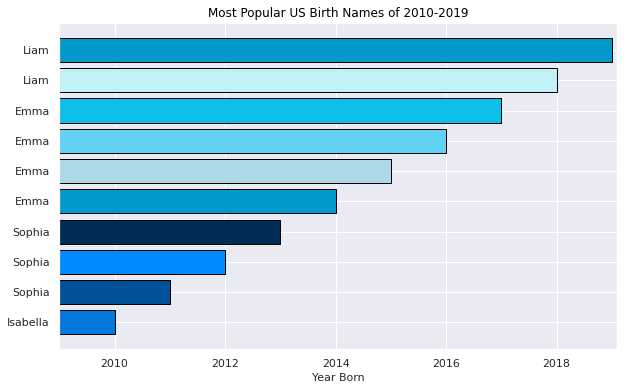

In [ ]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['ytick.labelsize'] = 11

df = df_quest_1.iloc[::-1]
y_pos = np.arange(len(df_quest_1['Given_Name']))

f, ax = plt.subplots(figsize=(10,6))
plt.barh(y_pos, df['Date_Of_Birth'], align='center', color = color_palette_list_multi,edgecolor='#000000')
plt.yticks(y_pos, df['Given_Name'])
plt.xlabel('Year Born', fontsize=11)
plt.xlim(2009,2019.1)
plt.title('Most Popular US Birth Names of 2010-2019')

plt.show()

#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barh.html

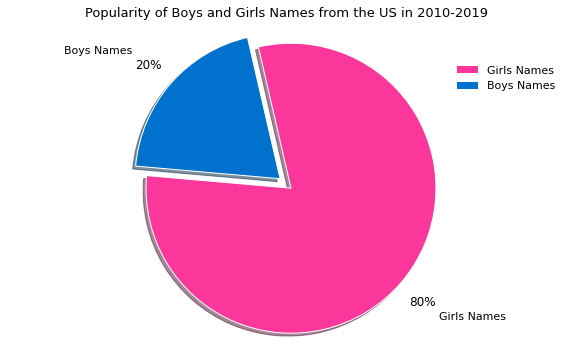

In [ ]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['font.size']=12

fig, ax = plt.subplots(figsize=(10,6))
labels = ['Girls Names','Boys Names']
per = [80, 20]
explode= (0.1,0)
ax.pie(per, explode=explode, labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=True, startangle=175,   
       pctdistance=1.2,labeldistance=1.35)
ax.axis('equal')
ax.set_title("Popularity of Boys and Girls Names from the US in 2010-2019",fontsize=13)
ax.legend(frameon=False, bbox_to_anchor=(1,0.9))
plt.show()

# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html

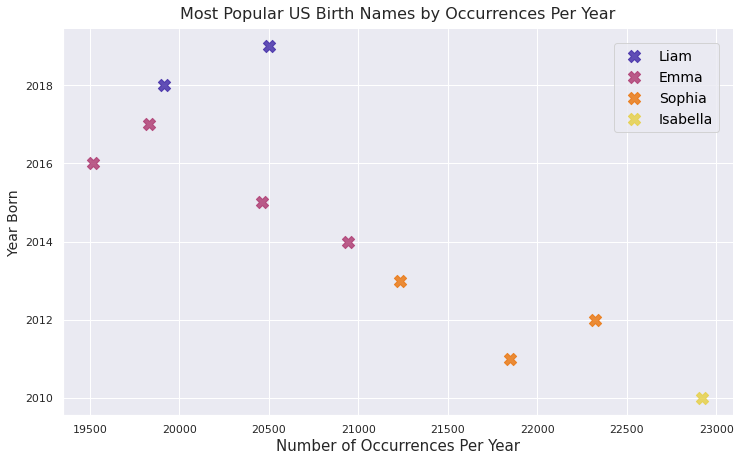

In [ ]:
with sns.axes_style("darkgrid"):
  sns.lmplot(x='Occurrences', y='Date_Of_Birth', data=df_quest_1,
             fit_reg=False, hue='Given_Name', markers='X',scatter_kws={"s": 150}, height=6, aspect=1.7, legend=False, palette='CMRmap')
plt.title('Most Popular US Birth Names by Occurrences Per Year',fontsize=16,pad=10)
plt.xlabel('Number of Occurrences Per Year', fontsize=15)
plt.ylabel('Year Born', fontsize=14)
plt.legend(bbox_to_anchor=(0.99,0.98),fontsize=14)
plt.show()
# Tweak using Matplotlib

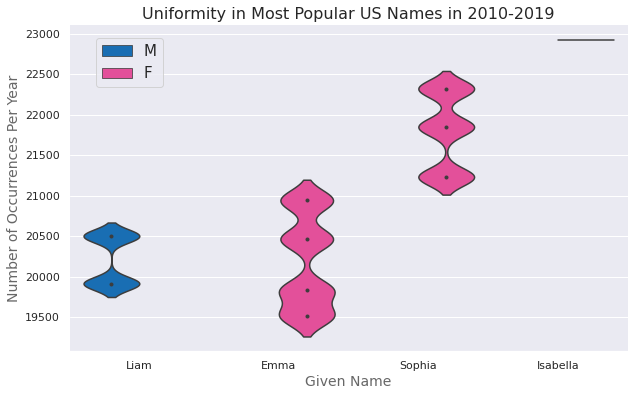

In [ ]:
with sns.axes_style("darkgrid"):
  f, ax = plt.subplots(figsize=(10, 6))
  sns.violinplot(x="Given_Name",y="Occurrences", hue='Sex', data= df_quest_1, palette= color_palette_list[::-1] , inner='point', bw =.2, cut=2)
  sns.despine(left=True)

  plt.title('Uniformity in Most Popular US Names in 2010-2019', fontsize=16)
  ax.set_xlabel("Given Name",size = 14,alpha=0.7)
  ax.set_ylabel("Number of Occurrences Per Year",size = 14,alpha=0.7)
  plt.legend(bbox_to_anchor=(0.18,0.985),fontsize=15)
  plt.show()
# https://seaborn.pydata.org/generated/seaborn.violinplot.html

# Question 2

In [ ]:
df_quest_2_GOT

,Given_Name,Sex,Occurrences
0,Arya,F,5579
1,Khaleesi,F,1004
2,Jaime,M,983
3,Daenerys,F,183
4,Jaime,F,43
5,Arya,M,31
6,Tyrion,M,5


In [ ]:
palette_GOT = ['#561D25','#CE8147','#ECDD7B','#D3E298','#037971','#011638','#EE964B']

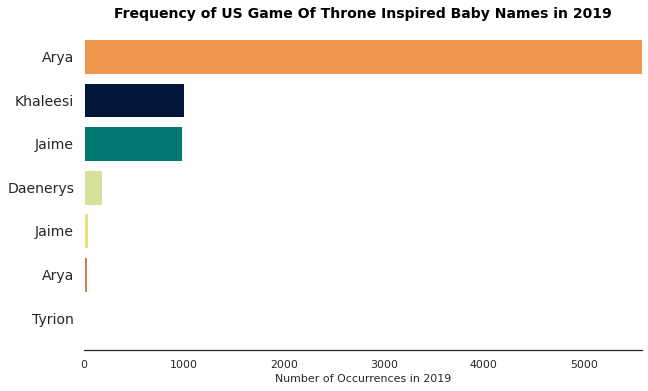

In [ ]:
with sns.axes_style("white"):
  plt.rcParams['font.sans-serif'] = 'Arial'
  plt.rcParams['font.family'] = 'sans-serif'
  plt.rcParams['text.color'] = '#000000'
  plt.rcParams['ytick.labelsize'] = 14

  df = df_quest_2_GOT.iloc[::-1]
  y_pos = np.arange(len(df_quest_2_GOT['Given_Name']))

  f, ax = plt.subplots(figsize=(10,6))
  plt.barh(y_pos, df['Occurrences'], align='center', color = palette_GOT,edgecolor='#FFFFFF')
  plt.yticks(y_pos, df['Given_Name'])
  plt.xlabel('Number of Occurrences in 2019', fontsize=11)
  plt.title('Frequency of US Game Of Throne Inspired Baby Names in 2019', fontsize=14, fontweight='heavy')
  plt.xlim(0,5580)
  sns.despine(left=True)
  plt.show()

#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barh.html

In [ ]:
df_quest_2_Arya

,Given_Name,Sex,Occurrences,Date_Of_Birth
0,Arya,F,1629,2015
1,Arya,F,1546,2014
2,Arya,F,1117,2013
3,Arya,F,724,2012
4,Arya,F,344,2011


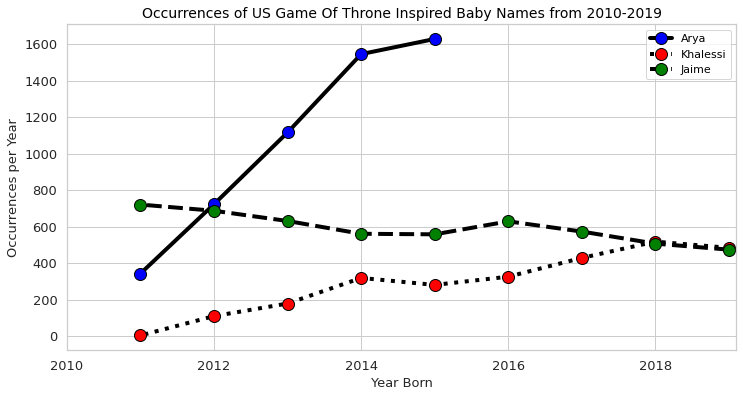

In [ ]:
with sns.axes_style("whitegrid"):
  plt.rcParams['font.sans-serif'] = 'Arial'
  plt.rcParams['text.color'] = '#000000'
  plt.rcParams['ytick.labelsize'] = 13
  plt.rcParams['xtick.labelsize'] = 13

  f, ax = plt.subplots(figsize=(12,6))
  plt.plot( 'Date_Of_Birth', 'Occurrences', data=df_quest_2_Arya, marker='o', markerfacecolor='blue', markersize=12, color='black', linewidth=4, label='Arya')
  plt.plot( 'Date_Of_Birth', 'Occurrences', data=df_quest_2_Khal, marker='o', markerfacecolor='red', markersize=12, linestyle='dotted', color='black', linewidth=4, label='Khalessi')
  plt.plot( 'Date_Of_Birth', 'Occurrences', data=df_quest_2_Jaime, marker='o',markerfacecolor='green', markersize=12, linestyle='dashed', color='black', linewidth=4, label='Jaime')
  plt.xlim(2010,2019.1)
  plt.xlabel('Year Born', fontsize=13)
  plt.ylabel('Occurrences per Year', fontsize=13)
  plt.title('Occurrences of US Game Of Throne Inspired Baby Names from 2010-2019', fontsize=14, fontweight='light')
  plt.legend()
  plt.show()

# Marvel

In [ ]:
df_quest_2_Marvel

,Given_Name,Sex,Occurrences
0,Parker,M,7865
1,Parker,F,3706
2,Loki,M,141
3,Nakia,F,5


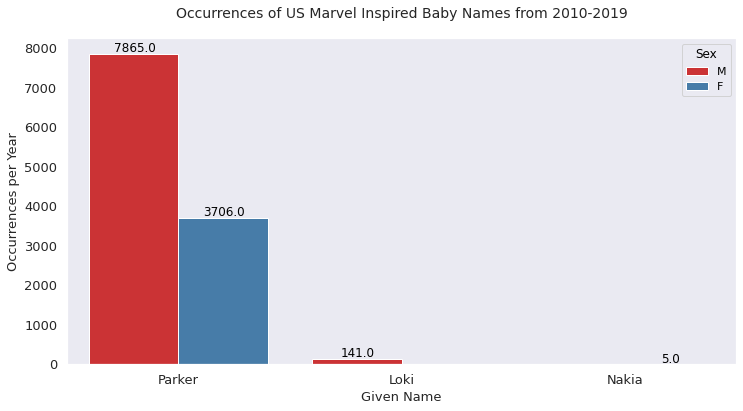

In [ ]:
with sns.axes_style("dark"):
  f, ax = plt.subplots(figsize=(12,6))
  plt.rcParams['font.sans-serif'] = 'Arial'
  plt.rcParams['text.color'] = '#000000'
  plt.rcParams['ytick.labelsize'] = 13
  plt.rcParams['xtick.labelsize'] = 13
  a = sns.barplot(data = df_quest_2_Marvel,x = 'Given_Name',y = 'Occurrences', hue='Sex', palette='Set1')
  for p in a.patches:
    a.annotate(format(p.get_height(), '.1f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (1, 5), 
                  textcoords = 'offset points')
  plt.xlabel('Given Name', fontsize=13)
  plt.ylabel('Occurrences per Year', fontsize=13)
  plt.title('Occurrences of US Marvel Inspired Baby Names from 2010-2019', fontsize=14, fontweight='light', pad=20)
plt.show()

#https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/
#https://matplotlib.org/3.1.1/tutorials/text/annotations.html

In [ ]:
df_quest_2_Loki

,Given_Name,Sex,Occurrences,Date_Of_Birth
0,Loki,M,83,2019
1,Loki,M,58,2018
2,Loki,M,37,2017
3,Loki,M,32,2016
4,Loki,M,64,2015
5,Loki,M,50,2014
6,Loki,M,42,2013
7,Loki,M,18,2012
8,Loki,M,11,2011
9,Loki,M,17,2010


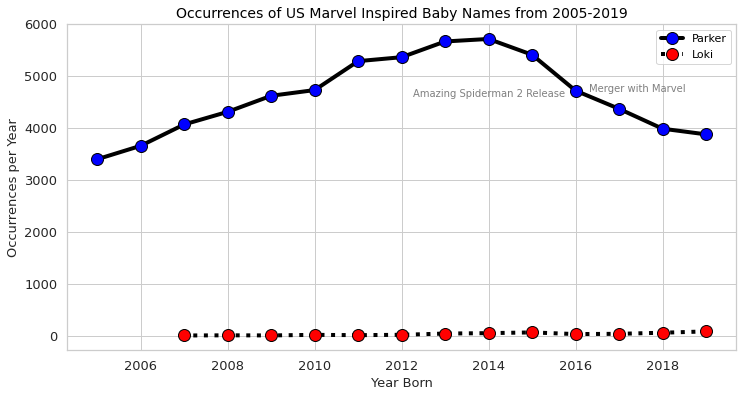

In [ ]:
with sns.axes_style("whitegrid"):
  plt.rcParams['font.sans-serif'] = 'Arial'
  plt.rcParams['text.color'] = '#000000'
  plt.rcParams['ytick.labelsize'] = 13
  plt.rcParams['xtick.labelsize'] = 13
  f, ax = plt.subplots(figsize=(12,6))
  b = plt.plot( 'Date_Of_Birth', 'Occurrences', data=df_quest_2_Parker, marker='o', markerfacecolor='blue', markersize=12, color='black', linewidth=4, label='Parker')
  style = dict(size=10, color='gray')

  ax.text(2016.3, 4700, "Merger with Marvel", **style)
  ax.text(2014, 4600, "Amazing Spiderman 2 Release", ha='center', **style)

  plt.plot( 'Date_Of_Birth', 'Occurrences', data=df_quest_2_Loki, marker='o', markerfacecolor='red', markersize=12, linestyle='dotted', color='black', linewidth=4, label='Loki')
  plt.xlabel('Year Born', fontsize=13)
  plt.ylabel('Occurrences per Year', fontsize=13)
  plt.title('Occurrences of US Marvel Inspired Baby Names from 2005-2019', fontsize=14, fontweight='light')
  plt.legend()
  plt.show()
  #https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html